# Taller 5

# Punto 1

Implemente el algoritmo de búsqueda en profundidad (DFS) y pruebelo para recorrer el grafo del laberinto de pacman.

In [20]:
def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

In [21]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

dfs(graph, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

# Punto 2

Realice el análisis del tiempo de ejecución del algoritmo DFS, justifiquelo.

In [22]:
import math
import numpy as np
import pylab as pl
import time 
import random 
import pylab  
import math
import numpy as np


In [23]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [24]:
def exper_analysis_time(n):
    results = []
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        tic = time.clock()
        dfs(graph, 'A') 
        toc = time.clock()
        results.append((toc-tic))
    return results

[2.2807253628798208e-05, 1.3114170826611371e-05, 1.3114170826611371e-05, 1.1403626842820813e-05, 1.1403626842820813e-05, 1.1403626842820813e-05, 1.1403626785977394e-05, 1.1403626785977394e-05, 1.1403626785977394e-05, 1.1973808170750999e-05]


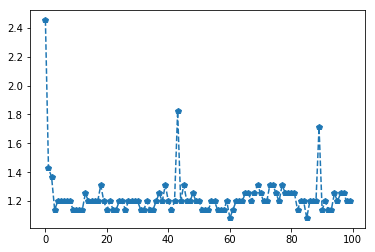

In [25]:
print (exper_analysis_time(10))

pylab.clf()
x = np.arange(100)
y = np.array(exper_analysis_time(100))*100000

pylab.plot(x, y, 'p--')
pylab.show()

# Punto 3

Diseñe e implemente un algoritmo que identifique ciclos en un grafo.

In [28]:
global cont

In [29]:
def dfs_rec(adjLists, visited, v,lista):
    global cont
    visited[v] = True
    for w in adjLists[v]:
        if(not visited[w]):
            lista.append(v)
            dfs_rec(adjLists, visited, w,lista)
        else:
            cont+=1


In [30]:
def dfs_ciclo(adjLists):
    global cont
    cont=0
    visited = []
    n = len(adjLists)

        
    for i in range(n):
        for j in range(n):
            visited.append(False)

        lista=[]
        dfs_rec(adjLists, visited, i,lista)
        visited = []
    if cont>0:
        print ('El grafo tiene ciclos')
    else:
        print ('El grafo no tiene ciclos')

In [31]:
graph_example_1 = { 0 : [3,5],
                    1 : [2,4,5],
                    2 : [1,3,5],
                    3 : [2,0],
                    4 : [1,5],
                    5 : [1,2,4,0]}

graph_example_2 = { 0 : [1],
                    1 : [2],
                    2 : [3],
                    3 : []}

dfs_ciclo(graph_example_1)
dfs_ciclo(graph_example_2)

El grafo tiene ciclos
El grafo no tiene ciclos


# Punto 4

Diseñe e implemente un algoritmo que verifique si un grafo es bipartito o no.

In [43]:
def bipartito(adjLists,inicio):
    n = len(adjLists)
    color=[]
    visited = []
    cont= "Es bipartito"
    for k in range(n):
        visited.append(False)
        color.append(0)
    color[0]=1
    sol=True
    for i in range(n):
        for j in adjLists[i]:
            if color[j]==0:
                if color[i]==1:
                    color[j]=2
                else:
                    color[j]=1
            else:
                if color[j]==color[i]:
                    sol=False
                    cont= "No es bipartito"
            
    print (cont)

In [44]:
graph_example_1 = { 0 : [3,5],
                    1 : [2,4,5],
                    2 : [1,3,5],
                    3 : [2,0],
                    4 : [1,5],
                    5 : [1,2,4,0]}
graph_example_2 = { 0 : [3,5],
                    1 : [2,4],
                    2 : [1,3,5],
                    3 : [2,0],
                    4 : [1,5],
                    5 : [2,4,0]}

bipartito(graph_example_1,0)
bipartito(graph_example_2,0)

No es bipartito
Es bipartito


# Punto 5

Modifique el algoritmo de dijkstra para solucionar el problema de la ruta más corta en un grafo sin pesos, i.e. partiendo de un vertice inicial encontrar la ruta y su distancia a todos los demás vertices haciendo la menor cantidad de saltos (vertices en la ruta)

In [45]:
def backtrac(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path

In [46]:
def Dijkstra(graph, source, target):
    queue = []
    visited = {}
    parent = {}
    
    for node in range(len(graph)):
        visited[node] = False
        parent[node] = None
    
    queue.append(source)
    while len(queue) != 0:
        current = queue.pop(0)
        if current == target:
            return backtrac(parent, source, target)
            break
        for neighbor in graph[current]:
            if(neighbor in visited.keys()):
                if visited[neighbor] == False:
                    visited[neighbor] = True
                    parent[neighbor] = current
                    queue.append(neighbor)

In [47]:
def shortestPath(G,inicio):
    lista=[]
    v=inicio;
    for d in G:
        if(v!=d):
            lista.append(Dijkstra(G,v,d));
    return lista;

In [48]:
grafo = {1: set([3,2,6]),
         2: set([3,1,4]),
         3: set([1,2,6,4]),
         4: set([2,3,5]),
         5: set([4,6]),
         6: set([1,3,5])}


shortestPath(grafo,6)

[[6, 1], [6, 1, 2], [6, 3], [6, 3, 4], [6, 5]]